<a href="https://colab.research.google.com/github/MarcosCosta-Py/QuarentenaDados/blob/master/QuarentenaDados_Aula03_(Alura).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Aula 3: Correlações e exploração de dados.**

**Introdução**:

Vamos começar importando a nossa base de dados! Nessa aula iremos trabalhar com a IMBD 5000, base que contém uma série de informações sobre filmes, sendo uma pequena amostra da famosa base de dados [IMDB](https://www.imdb.com/).

In [0]:
# Importando as bibliotecas necessárias, lendo o arquivo de dados da IMDB e apresentando as 5 primeiras linhas.
import pandas as pd
import matplotlib.pyplot as plt
imdb = pd.read_csv("https://gist.githubusercontent.com/guilhermesilveira/24e271e68afe8fd257911217b88b2e07/raw/e70287fb1dcaad4215c3f3c9deda644058a616bc/movie_metadata.csv")
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


Iniciamos tentando conhecer as diversas colunas de cada filme e uma das que chamou mais a atenção foi a color. Vamos conhecer quais valores temos nesta colunas.

In [0]:
# Vendo os possiveis valores unicos que preenchem a coluna "color".
imdb["color"].unique()

array(['Color', nan, ' Black and White'], dtype=object)

Verificamos que essa coluna **color** informa se o filme é colorido ou é preto e branco. Vamos descobrir agora quantos filmes de cada tipo nós temos:

In [0]:
# Verificando a frequência de cada valor da coluna "color", sem considerar os valores não preenchidos(Nan). 
imdb["color"].value_counts()

Color               4815
 Black and White     209
Name: color, dtype: int64

In [0]:
# Verificando a frequência em porcentagem de cada valor da coluna "color", sem considerar os valores não preenchidos(Nan)
imdb["color"].value_counts(normalize=True)

Color               0.9584
 Black and White    0.0416
Name: color, dtype: float64

In [0]:
# Vendo o tamanho da coluna "color".
imdb['color'].shape[0]

5043

In [0]:
# Contabilizando os valores não preenchidos(NaN) da coluna "color".
imdb['color'].isnull().sum()

19

In [0]:
# Verificando a porcentagem de cada elemento da coluna color, INCLUINDO os valores não preenchidos(NaN).
porc_nan = imdb['color'].isnull().sum()/imdb['color'].shape[0]
porc_color = imdb['color'].value_counts()[0]/imdb['color'].shape[0]
porc_bw = imdb['color'].value_counts()[1]/imdb['color'].shape[0]
print("A porcentagem de valores faltantes da coluna 'color' é: {}%".format(round(porc_nan*100,2)))
print('\n')
print("A porcentagem de filmes coloridos da coluna 'color' é: {}%".format(round(porc_color*100,2)))
print('\n')
print("A porcentagem de filmes preto e branco da coluna 'color' é: {}%".format(round(porc_bw*100,2)))

A porcentagem de valores faltantes da coluna 'color' é: 0.38%


A porcentagem de filmes coloridos da coluna 'color' é: 95.48%


A porcentagem de filmes preto e branco da coluna 'color' é: 4.14%


Agora já descobrimos quantos filmes coloridos, preto e branco e valores faltantes temos, e também sabemos que há mais de 5000 filmes na base. Fizemos algo novo, que foi chamar o `value_counts()`, passando o parâmetro **normalize como True**. Desse modo, já calculamos qual é a participação de cada um dos tipos de filmes (**95% são filmes coloridos**).

Excelente! Agora vamos explorar outra coluna a fim de conhecer os diretores que tem mais filmes na nossa base de dados (**lembrando que nossa base é uma amostra muito pequena da realidade**)

In [0]:
# Apresentando os diretores e quantas vezes aparece nas linhas do DataFrame.
imdb["director_name"].value_counts()

Steven Spielberg    26
Woody Allen         22
Martin Scorsese     20
Clint Eastwood      20
Ridley Scott        17
                    ..
Måns Mårlind         1
Rakesh Roshan        1
Ricki Stern          1
Barrett Esposito     1
Gerry Lively         1
Name: director_name, Length: 2398, dtype: int64

**Steven Spielberg e Woody Allen** são os diretores com mais filmes no **IMDB 5000**.

Continuando com nossa exploração de algumas informações, vamos olhar para o número de críticas por filmes.

In [0]:
# Apresentando a coluna de críticas por filmes.
imdb["num_critic_for_reviews"]

0       723.0
1       302.0
2       602.0
3       813.0
4         NaN
        ...  
5038      1.0
5039     43.0
5040     13.0
5041     14.0
5042     43.0
Name: num_critic_for_reviews, Length: 5043, dtype: float64

In [0]:
# Apresentando as estatísticas básicas da coluna de críticas por filmes.
imdb["num_critic_for_reviews"].describe()

count    4993.000000
mean      140.194272
std       121.601675
min         1.000000
25%        50.000000
50%       110.000000
75%       195.000000
max       813.000000
Name: num_critic_for_reviews, dtype: float64

  É possível observar que há em média 140 críticas por filmes, o **min** representa que todos filmes têm críticas, pelo menos uma, e o filme mais criticado tem 813 avaliações.

Veja que as colunas **color** e **director_name** são *strings*, não fazendo sentido olhar para médias, medianas e afins. Olhar para o número de avaliações já pode ser interessante, por isso usamos o `.describe()`.

Agora podemos até plotar um histograma para avaliar o número de review.

Text(0.5, 0, 'Número de críticas')

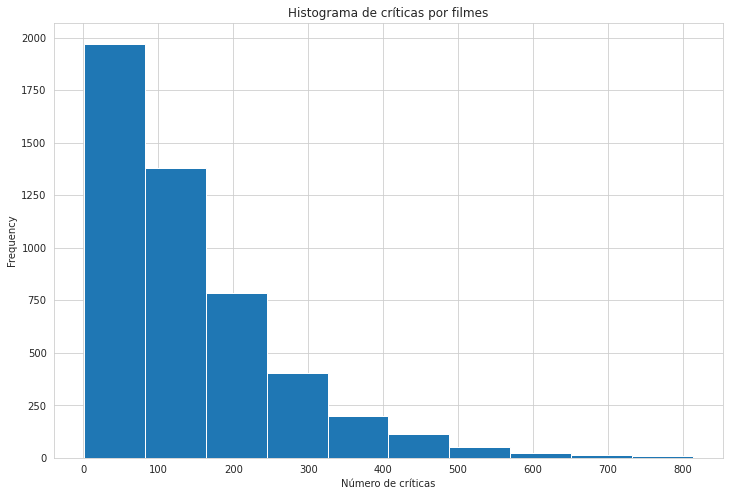

In [0]:
# importando seaborn para trabalhar com os gráficos e plotando um histograma de críticas por filmes.
import seaborn as sns
plt.figure(figsize=(12,8))
sns.set_style("whitegrid")
imdb["num_critic_for_reviews"].plot(kind='hist', title='Histograma de críticas por filmes')
plt.xlabel('Número de críticas')

Verificamos que poucos filmes tem mais de 500 votos, por isso um paralelo que podemos fazer é que filmes com muitos votos são mais populares e filmes com poucos votos não são tão populares. Logo, pelo histograma fica evidente que poucos filmes fazem muito muito sucesso. Claro que não conseguimos afirmar isso com propriedade, pois, novamente, estamos lidando com um número restrito de dados, mas são pontos interessantes de se pensar.

Outra informação interessante de se analisar, são os orçamentos e receitas de um filme, ou seja, o aspecto financeiro. Vamos começar pelo gross:

Text(0.5, 1.0, 'Histograma de faturamento por filmes')

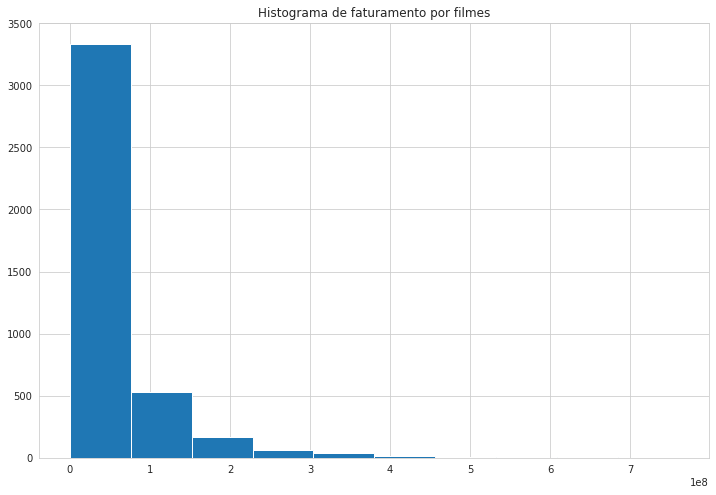

In [0]:
# Histograma para faturamento
plt.figure(figsize=(12,8))
imdb["gross"].hist()
plt.title('Histograma de faturamento por filmes')

 Como você deve ter reparado, essa é a primeira vez que as escalas estão totalmente diferentes, pois no eixo **X** temos valores tão altos que a escala teve que ser de centena de milhões. Veja como pouquíssimos filmes tem **alto faturamento**, o que nos acende um primeiro alerta de que tem algo estranho (ou temos filmes que rendem muito dinheiro neste dataset).

 Vamos tentar conhecer quais são esses filmes com faturamento astronômico.


In [0]:
# Ordenando o DataFrame de forma decrescecente por "gross", para saber quais são os filmes com maiores faturamentos.
imdb.sort_values("gross", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
26,Color,James Cameron,315.0,194.0,0.0,794.0,Kate Winslet,29000.0,658672302.0,Drama|Romance,Leonardo DiCaprio,Titanic,793059,45223,Gloria Stuart,0.0,artist|love|ship|titanic|wet,http://www.imdb.com/title/tt0120338/?ref_=fn_t...,2528.0,English,USA,PG-13,200000000.0,1997.0,14000.0,7.7,2.35,26000
29,Color,Colin Trevorrow,644.0,124.0,365.0,1000.0,Judy Greer,3000.0,652177271.0,Action|Adventure|Sci-Fi|Thriller,Bryce Dallas Howard,Jurassic World,418214,8458,Omar Sy,0.0,dinosaur|disaster film|experiment gone wrong|j...,http://www.imdb.com/title/tt0369610/?ref_=fn_t...,1290.0,English,USA,PG-13,150000000.0,2015.0,2000.0,7.0,2.00,150000
794,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000
17,Color,Joss Whedon,703.0,173.0,0.0,19000.0,Robert Downey Jr.,26000.0,623279547.0,Action|Adventure|Sci-Fi,Chris Hemsworth,The Avengers,995415,87697,Scarlett Johansson,3.0,alien invasion|assassin|battle|iron man|soldier,http://www.imdb.com/title/tt0848228/?ref_=fn_t...,1722.0,English,USA,PG-13,220000000.0,2012.0,21000.0,8.1,1.85,123000


Nessa lista temos **Avatar, Titanic, Jurassic World e The Avengers**, o que parece fazer sentido para nós, pois sabemos que esses foram filmes com bilheterias gigantescas. Analisando esses dados conseguimos verificar que os maiores faturamentos fazem sentido, mas encontramos um problema nos dados, dado que encontramos duas linhas diplicadas. Podemos usar o pandas para remover esses dados, mas por enquanto vamos manter todas as informações (Se estiver curioso em saber como se faz, consulte o [`.drop_duplicates()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop_duplicates.html)).

Maravilha, agora temos o faturamento e parece estar OK. Queremos começar a responder algumas perguntas e uma delas é: será que filmes coloridos tem faturamento maior que filmes preto e branco?

Para começar a responder essa pergunta precisamos transformar a coluna Color:

In [0]:
# Separando o DataFrame de acordo com os dados de interesse da coluna "color" e criando uma coluna que usa os termos Color e Black and White como 1 e 0 respectivamente.
color_or_bw = imdb.query("color in ['Color', ' Black and White']")
color_or_bw["color_0_ou_1"] = (color_or_bw["color"]=="Color") * 1
color_or_bw["color_0_ou_1"].value_counts()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


1    4815
0     209
Name: color_0_ou_1, dtype: int64

In [0]:
# Apresentando as 5 primeiras linhas com a nova coluna do sub DataFrame.
color_or_bw.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,color_0_ou_1
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000,1
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0,1
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000,1
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000,1
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,1


Veja que agora nós temos uma última coluna em nosso dataframe com valores 0 e 1. Agora podemos construir gráficos com essa informação de filmes coloridos ou não.

**Atenção:** esta base tem problemas com a frase Black and White, pois há um espaço no início dela.

Text(0.5, 1.0, 'Filmes coloridos e Preto e branco por faturamento')

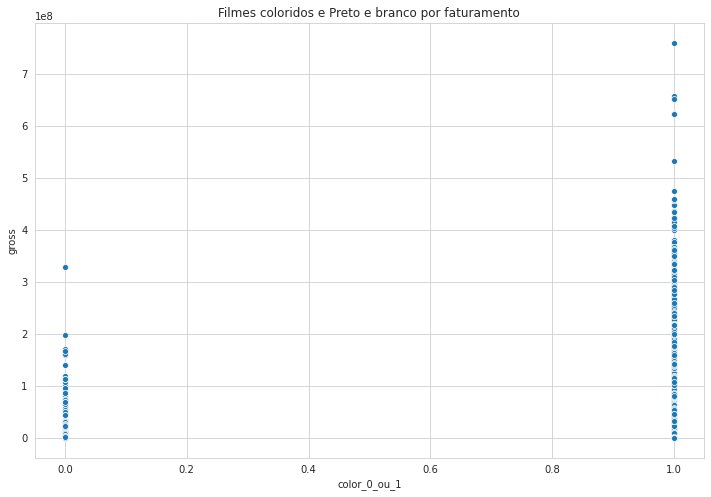

In [0]:
# Plotando um gráfico de filmes coloridos ou branco e preto por faturamento.
plt.figure(figsize=(12,8))
sns.scatterplot(data=color_or_bw, x="color_0_ou_1", y="gross")
plt.title("Filmes coloridos e Preto e branco por faturamento")

Então plotamos nossos dados com um displot! Existem várias formas de visualizar essa informação, mas por hora essa nos ajuda a comparar os resultados. Repare como filmes coloridos tem valores bem maiores (isso já era até esperado), mas também temos pontos bem altos em filmes preto e branco, chamando muito atenção.

Vamos explorar algumas estatísticas destes filmes:

In [0]:
# Média de faturamento dos filmes coloridos e Preto e Branco.
color_or_bw.groupby("color").mean()["gross"].sort_values(ascending=False)

color
Color               4.902619e+07
 Black and White    3.245702e+07
Name: gross, dtype: float64

In [0]:
# Média das notas entre filmes coloridos e preto e branco.
color_or_bw.groupby("color").mean()["imdb_score"]

color
 Black and White    7.227273
Color               6.409533
Name: imdb_score, dtype: float64

In [0]:
# Mediana das notas entre filmes coloridos e preto e branco.
color_or_bw.groupby("color").median()["imdb_score"]

color
 Black and White    7.4
Color               6.5
Name: imdb_score, dtype: float64

Das estatísticas temos duas bem interessantes, a média e mediana das notas de filmes preto e branco são maiores. Há várias possíveis explicações sobre o porquê disso, por exemplo, as pessoas que buscaram assitir os filmes preto e branco já deviam ter uma indicação de que o filmes seria realmente bom, o que acarretaria em uma melhor avaliação.


A partir de agora, vamos fazer uma investigação melhor em relação às finanças dos filmes (faturamento e orçamento). Vamos iniciar plotando e interpretando um gráfico de **gross** por **budget**:

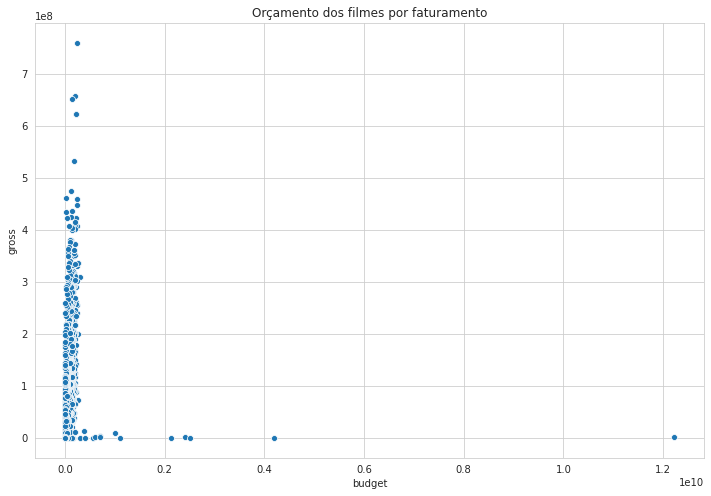

In [0]:
# Iniciamente criamos um novo DataFrame "budget_gross", ao qual foram tirados todos os valores "NaN" das colunas "budget" e "gross"
# e selecionados os valores acimas de 0 para ambas as colunas.
budget_gross=  imdb[["budget", "gross"]].dropna().query("budget >0 | gross > 0")
# Feito a seleção do Sub DataFrame, plotaremos um scatterplot.
plt.figure(figsize=(12,8))
plt.title("Orçamento dos filmes por faturamento")
sns.scatterplot(x="budget",
                y="gross", 
                data = budget_gross)

Para plotar os dados, primeiro removemos as linhas com informações de faturamento e orçamento vazias e também com valores igual a 0, para então gerar o gráfico.

Agora vamos analisar esse gráfico juntos, veja que a escala de **budget** mudou, agora é **e10**. Repare que apenas poucos filmes tem orçamentos tão grandes assim, e seus faturamentos são muito baixos. Será que temos algum problema nos dados? Vamos investigar melhor!

In [0]:
# Ordenando o DataFrame pela coluna "budget" em ordem decrescente e apresentando as 5 primeiras linhas do DF.
imdb.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2988,Color,Joon-ho Bong,363.0,110.0,584.0,74.0,Kang-ho Song,629.0,2201412.0,Comedy|Drama|Horror|Sci-Fi,Doona Bae,The Host,68883,1173,Ah-sung Ko,0.0,daughter|han river|monster|river|seoul,http://www.imdb.com/title/tt0468492/?ref_=fn_t...,279.0,Korean,South Korea,R,1.221550e+10,2006.0,398.0,7.0,1.85,7000
3859,Color,Chan-wook Park,202.0,112.0,0.0,38.0,Yeong-ae Lee,717.0,211667.0,Crime|Drama,Min-sik Choi,Lady Vengeance,53508,907,Hye-jeong Kang,0.0,cake|christian|lesbian sex|oral sex|pregnant s...,http://www.imdb.com/title/tt0451094/?ref_=fn_t...,131.0,Korean,South Korea,R,4.200000e+09,2005.0,126.0,7.7,2.35,4000
3005,Color,Lajos Koltai,73.0,134.0,45.0,0.0,Péter Fancsikai,9.0,195888.0,Drama|Romance|War,Marcell Nagy,Fateless,5603,11,Bálint Péntek,0.0,bus|death|gay slur|hatred|jewish,http://www.imdb.com/title/tt0367082/?ref_=fn_t...,45.0,Hungarian,Hungary,R,2.500000e+09,2005.0,2.0,7.1,2.35,607
2323,Color,Hayao Miyazaki,174.0,134.0,6000.0,745.0,Jada Pinkett Smith,893.0,2298191.0,Adventure|Animation|Fantasy,Minnie Driver,Princess Mononoke,221552,2710,Billy Crudup,0.0,anime|cult film|forest|princess|studio ghibli,http://www.imdb.com/title/tt0119698/?ref_=fn_t...,570.0,Japanese,Japan,PG-13,2.400000e+09,1997.0,851.0,8.4,1.85,11000
2334,Color,Katsuhiro Ôtomo,105.0,103.0,78.0,101.0,Robin Atkin Downes,488.0,410388.0,Action|Adventure|Animation|Family|Sci-Fi|Thriller,William Hootkins,Steamboy,13727,991,Rosalind Ayres,1.0,19th century|ball|boy|inventor|steam,http://www.imdb.com/title/tt0348121/?ref_=fn_t...,79.0,Japanese,Japan,PG-13,2.127520e+09,2004.0,336.0,6.9,1.85,973


Ordenando os dados pelo **budget** percebemos que as primeiras posições são de filmes asiáticos. O Guilherme trouxe um ponto interessante para a investigação, pois países como a Coreia usam moedas que tem três casas decimais a mais que o dólar. Então provavelmente o que está ocorrendo é que os dados de orçamento tem valores na moeda local, por isso detectamos valores tão discrepantes. 

Como não temos garantia dos números, vamos precisar trabalhar apenas com filmes americanos, assim garantimos que tanto gross e budget estão em dólares. Então vamos iniciar esse processo:

In [0]:
# Verificando todos os possiveis paises de produção dos filmes.
imdb["country"].unique()

array(['USA', 'UK', nan, 'New Zealand', 'Canada', 'Australia', 'Belgium',
       'Japan', 'Germany', 'China', 'France', 'New Line', 'Mexico',
       'Spain', 'Hong Kong', 'Czech Republic', 'India', 'Soviet Union',
       'South Korea', 'Peru', 'Italy', 'Russia', 'Aruba', 'Denmark',
       'Libya', 'Ireland', 'South Africa', 'Iceland', 'Switzerland',
       'Romania', 'West Germany', 'Chile', 'Netherlands', 'Hungary',
       'Panama', 'Greece', 'Sweden', 'Norway', 'Taiwan', 'Official site',
       'Cambodia', 'Thailand', 'Slovakia', 'Bulgaria', 'Iran', 'Poland',
       'Georgia', 'Turkey', 'Nigeria', 'Brazil', 'Finland', 'Bahamas',
       'Argentina', 'Colombia', 'Israel', 'Egypt', 'Kyrgyzstan',
       'Indonesia', 'Pakistan', 'Slovenia', 'Afghanistan',
       'Dominican Republic', 'Cameroon', 'United Arab Emirates', 'Kenya',
       'Philippines'], dtype=object)

Veja que temos filmes de diversos locais de origem.

In [0]:
# Eliminando as linhas duplicadas
imdb = imdb.drop_duplicates()
# Criando um sub DataFrame com filmes de origem americana apenas e ordenando de forma decrescente pelo orçamento.
imdb_usa = imdb.query("country == 'USA'")
imdb_usa.sort_values("budget", ascending=False).head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000
7,Color,Nathan Greno,324.0,100.0,15.0,284.0,Donna Murphy,799.0,200807262.0,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Brad Garrett,Tangled,294810,2036,M.C. Gainey,1.0,17th century|based on fairy tale|disney|flower...,http://www.imdb.com/title/tt0398286/?ref_=fn_t...,387.0,English,USA,PG,260000000.0,2010.0,553.0,7.8,1.85,29000
6,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383056,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0
3461,Color,Sam Raimi,392.0,156.0,0.0,4000.0,James Franco,24000.0,336530303.0,Action|Adventure|Romance,J.K. Simmons,Spider-Man 3,383071,46055,Kirsten Dunst,0.0,sandman|spider man|symbiote|venom|villain,http://www.imdb.com/title/tt0413300/?ref_=fn_t...,1902.0,English,USA,PG-13,258000000.0,2007.0,11000.0,6.2,2.35,0


Agora temos os dados para fazer uma análise melhor entre gross e budget. Vamos plotar o gráfico novamente:



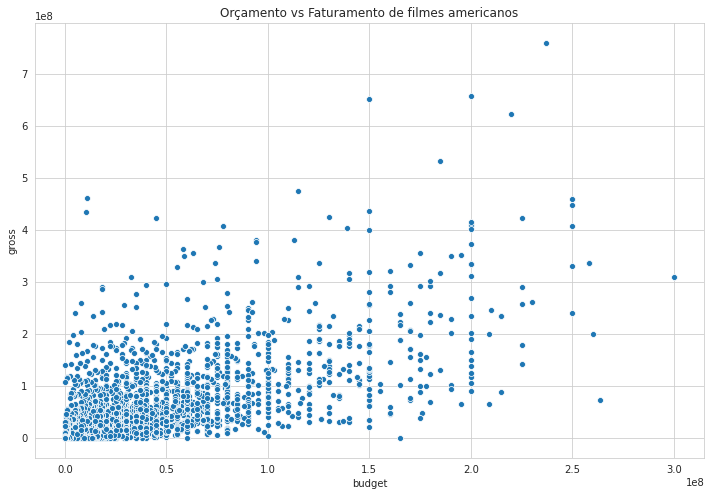

In [0]:
# Selecionando as variáveis de interesse para "budget_gross" do sub DF restrito a filmes americanos, com valores acima de 0 e excluindo os NaN.
budget_gross = imdb_usa[["budget", "gross"]].dropna().query("budget >0 | gross > 0")
# Plotando um scatterplot entre orçamento e faturamento de filmes americanos.
plt.figure(figsize=(12,8))
plt.title('Orçamento vs Faturamento de filmes americanos')
sns.scatterplot(x="budget", y="gross", data = budget_gross)

Veja que interessante, aparentemente temos uma relação entre orçamento e faturamento. Quanto maior o orçamento, maior o faturamento.

Já que estamos trabalhando com orçamento e faturamento, podemos construir uma nova informação, o lucro, para analisar. De forma bem simplista esse processo de construir novas informações a partir das existentes no dataset é conhecido como [feature engineering](https://en.wikipedia.org/wiki/Feature_engineering).

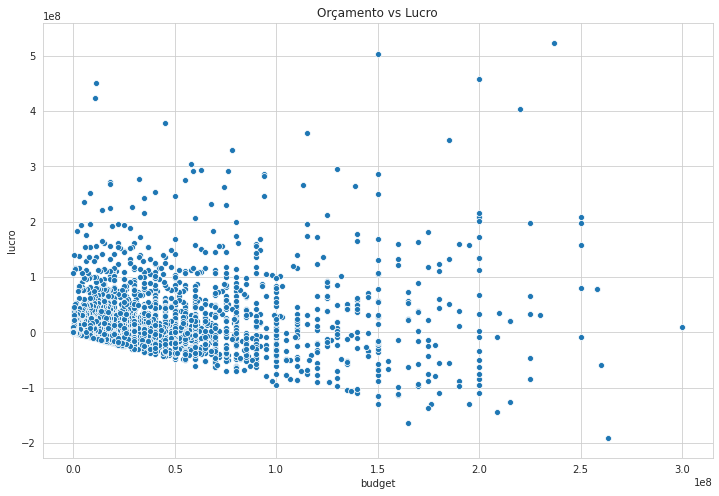

In [0]:
# Criando uma nova variável, "lucro" para o sub DF
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
# Selecionando as variáveis para o "budget_gross" com "lucros" e "budget" acima de 0 e retirando os valores faltantes.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
# Plotando um scatterplot de orçamento vs lucro.
plt.figure(figsize=(12,8))
plt.title('Orçamento vs Lucro')
sns.scatterplot(x="budget", y="lucro", data = budget_gross)

Muito bom! Nós construímos nossa coluna lucro na base de dados e plotamos o orçamento vs lucro.

Repare que temos pontos interessantes nesta visualização, um deles são esses filmes com muito custo e prejuizo. Isso pode ser um prejuizo real, mas também podem ser filmes que ainda não tiveram tempo de recuperar o investimento (lançamentos recentes). Outros pontos interessantes de se anlisar seriam os filmes com baixos orçamentos e muito lucro, será que são estão corretos ou pode ser algum erro da base? Parece que nem sempre gastar uma tonelada de dinheiro vai gerar lucros absurdos, será que é isso é verdade? 

Esse gráfico é muito rico em informações, vale a pena você gastar um tempo criando hipóteses.

Já que essa nova feature (lucro) parace ser interessante de se analisar, vamos continuar! Mas agora quero ver o lucro em relação ao ano de produção.

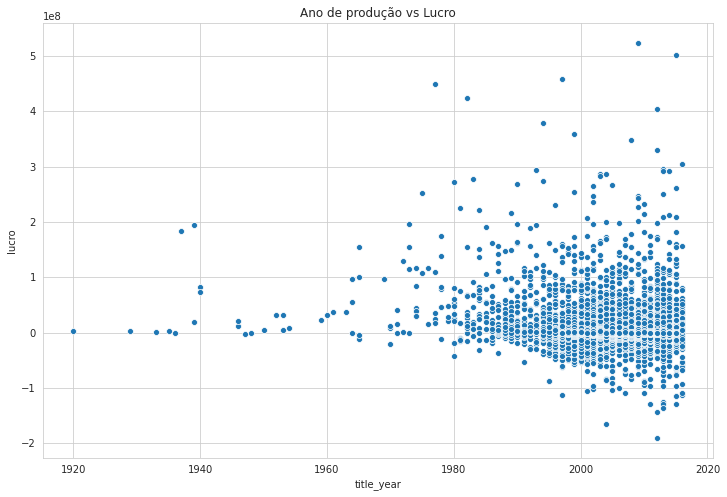

In [0]:
# Selecionando as variáveis lucro e ano de produção para plotar o gráfico.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
plt.figure(figsize=(12,8))
plt.title("Ano de produção vs Lucro")
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

Olha que legal esse gráfico, veja como alguns pontos mais recentes reforça a teoria de que alguns filmes podem ainda não ter recuperado o dinheiro investido (Claro que temos muitas variáveis para se analisar, mas é um indício relevante).

Outro ponto que chama muito atenção, são os filmes da década de 30 e 40 com lucros tão altos. Quais serão esses filmes? Bom, essa pergunta você vai responder no desafio do Paulo, que está louco para descobrir!

Falando em Paulo, ele sugeriu uma análise com os nome dos diretores e o orçamento de seus filmes, vamos ver se conseguimos concluir alguma coisa:

In [0]:
# Selecionando a quantidade de filmes por diretores.
filmes_por_diretor = imdb_usa["director_name"].value_counts()
# Criando um DF com as variáveis nome do diretor e orçamento, determinando "director_name" como índice e juntando com a quantidade de filmes por diretor.
gross_director = imdb_usa[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
# Definindo as colunas do novo DF
gross_director.columns=["dindin", "filmes_irmaos"]
gross_director = gross_director.reset_index()
gross_director['filmes_irmaos'].max()

24.0

24.0

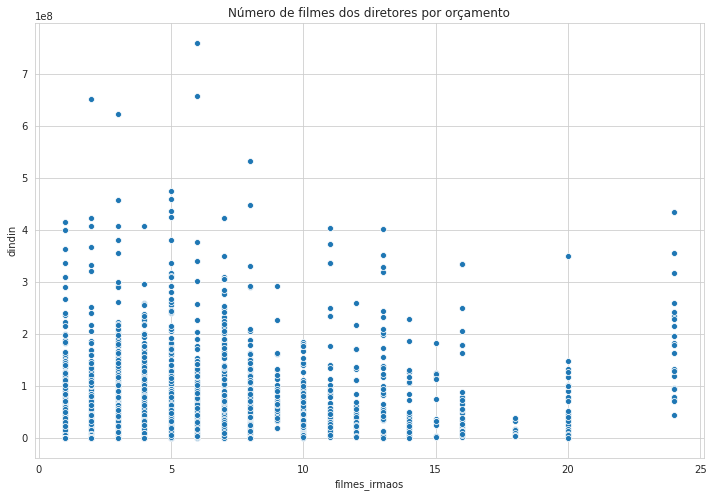

In [0]:
# Plotando um scatterplot de nº de filmes de diretores por orçamento.
plt.figure(figsize=(12,8))
plt.title("Número de filmes dos diretores por orçamento")
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

Essa imagem aparentemente não é muito conclusiva, então não conseguimos inferir tantas informações.

Esse processo de gerar dados, visualizações e acabar não sendo conclusivo é muito comum na vida de um cientista de dados, pode ir se acostumando =P.

Para finalizar, que tal realizar uma análise das correlações dos dados? Existem várias formas de calcular a correlação, esse é um assunto denso.Você pode ler mais sobre essas métricas neste [link](https://pt.wikipedia.org/wiki/Correla%C3%A7%C3%A3o).

Vamos então iniciar a análise das correlações plotando o pairplot.

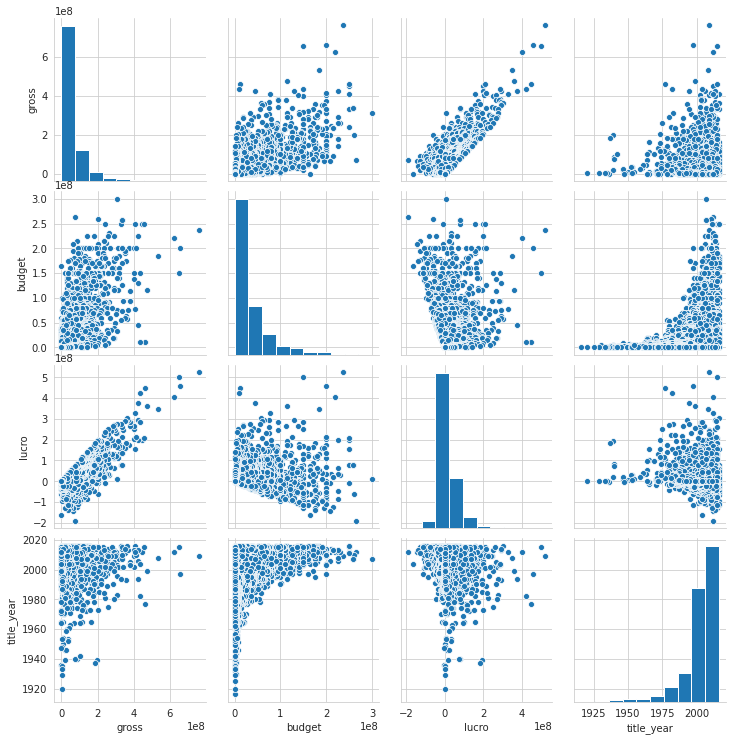

In [0]:
# Plotando gráficos que relacionam de todas a maneiras possiveis as variáveis selecionadas para possiveis identificações de correlações.
sns.pairplot(data = imdb_usa[["gross", "budget", "lucro", "title_year"]])

O pairplot mostra muita informação interessante para possiveis indicações de correlações.

Embora plotamos um monte de informação, não necessariamente reduzimos a correlação em um número para simplificar a análise. Vamos fazer isso com a ajuda do `.corr()` do [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html). 

In [0]:
# Criando uma tabela de correlções entre as variáveis.
imdb_usa[["gross", "budget", "lucro", "title_year"]].corr()

,gross,budget,lucro,title_year
gross,1.000000,0.645673,0.797037,0.034827
budget,0.645673,1.000000,0.053455,0.229453
lucro,0.797037,0.053455,1.000000,-0.123035
title_year,0.034827,0.229453,-0.123035,1.000000


Com o pandas é simples de se calcular a correlação, mas precisamos saber interpretar os resultados. Vamos fazer isso?

A correlação é uma métrica que vai de 1 a -1. Quando a correlação é 1, dizemos que é totalmente correlacionada (relação linear perfeita e positiva), ou seja se uma variável aumenta em 10 a outra também irá aumentar em 10. Quando o valor da correlação é -1, também temos variáveis totalmente correlacionda, só que de maneira negativa (relação linear perfeita negativa), neste caso, se uma variável aumenta em 10 a outra reduz em 10. Agora quando a correlação é 0 temos a inexistência de correlação, ou seja, uma variável não tem influêcia sobre a outra. 

Agora sim, entendido sobre a correlação vamos analisar as nossas. 

Veja que lucro e gross tem uma correlação alta, o que indica que quanto maior o faturamento maior o lucro (dado que o orçamento possilvemente é baixo e o faturamento alto),mas repare que a correlação não é perfeita, já o title_years e lucro tem correlação negativa, mas muito perto de zero (ou seja quase não tem correlação).

Uma correlação interessante, porém não muito alta, é da variável orçamento com a do faturamento, o que representa de certa forma, quanto maior o orçamento maior o faturamento (não necessariamente que a produção dos filmes sejam sempre satisfatória, pois não há uma relação linear perfeita positiva)

Viu como conseguimos analisar muitas coisas com a correlação?!


Com isso chegamos ao final de mais uma aula da **#quarentenadados.**


## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [0]:
# Salvando uma cópia do DF para tratar de acordo com o interesse.
imdb_b = imdb.copy()

In [0]:
# Verificando a maior e a menor nota das avaliações dos filmes
print(pd.DataFrame(imdb_b['imdb_score'].value_counts()).index.max())
print(pd.DataFrame(imdb_b['imdb_score'].value_counts()).index.min())

9.5
1.6


In [0]:
# Verificanco a quantidade de títulos de filmes
len(imdb_b['movie_title'].unique())

4917

In [0]:
# Calculando a média das notas por filmes e verificando a quantidade.
df_media = pd.DataFrame(imdb_b.groupby('movie_title')['imdb_score'].mean())
len(df_media)

4917

In [0]:
# Criando um DataFrame com as colunas de interesse e retirando os valores faltantes
df_o = imdb_b[['color','movie_title']].dropna().drop_duplicates()
df_or = df_o.join(df_media, on='movie_title')
df_or['color'].unique()

array(['Color', ' Black and White'], dtype=object)

In [0]:
df_color = df_or.query('color == "Color"')
df_bw = df_or.query('color == " Black and White"')

In [0]:
df_color.rename(columns={'imdb_score':'Color'}, inplace=True)
df_bw.rename(columns={'imdb_score':'Black and White'}, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


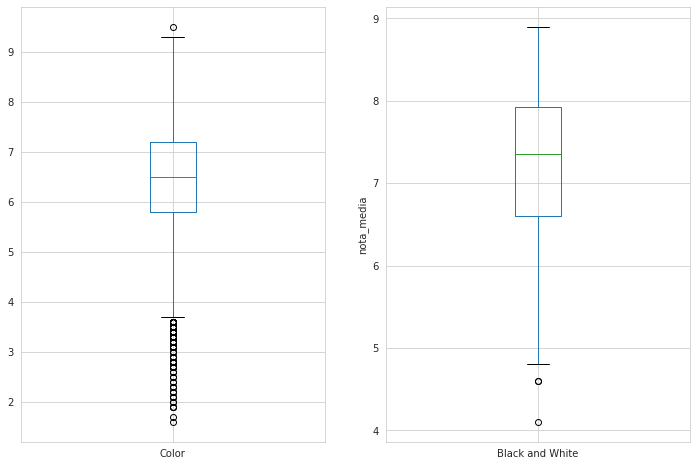

In [0]:
fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(12,8))
plt.ylabel('nota_media')
df_color.plot(ax=ax1,kind='box')
df_bw.plot(ax=ax2,kind='box')

Analisando os Box-Plots dispostos acima, percebemos que o primeiro, referente aos filmes coloridos, tem um grande número de valores fora do padrão, abaixo do limite inferior e um acima do limite superior, ademais 50% da concentração dos dados centrais esta entre 5.8 e 7.2 em avaliações médias.

Com respeito aos filmes Preto e Branco é possível perceber apenas dois valores fora do padrão, abaixo do limite inferior do gráfico, tendo uma distribuição de 50% dos dados centrais entre 6.7 e 7.9 , com maior variabilidade no intervalo.

##Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra qual é esse filme (budget próximo de 2.5).

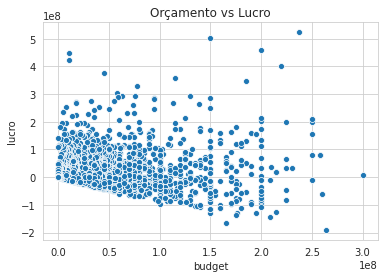

In [0]:
# Criando uma nova variável, "lucro" para o sub DF
imdb_usa['lucro'] = imdb_usa['gross'] - imdb_usa['budget']
# Selecionando as variáveis para o "budget_gross" com "lucros" e "budget" acima de 0 e retirando os valores faltantes.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
# Plotando um scatterplot de orçamento vs lucro.
plt.title('Orçamento vs Lucro')
sns.scatterplot(x="budget", y="lucro", data = budget_gross)

In [0]:
# Com base no gráfico, percebemos que o ponto a ser analisado é o segundo na ordem decrescente de budget, para tanto, ordenamos o DF com esse aspecto.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["budget", "lucro"]].dropna()
budget_gross.sort_values('budget', ascending=False).head()

,budget,lucro
1,300000000.0,9404152.0
5,263700000.0,-190641321.0
7,260000000.0,-59192738.0
6,258000000.0,78530303.0
3461,258000000.0,78530303.0


In [0]:
# Sabendo que o filme esta na segunda colocação, basta pegar o valor do seu budget é apresentar o filme referente a ele.
imdb_usa.query('budget == 263700000.0 ')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
5,Color,Andrew Stanton,462.0,132.0,475.0,530.0,Samantha Morton,640.0,73058679.0,Action|Adventure|Sci-Fi,Daryl Sabara,John Carter,212204,1873,Polly Walker,1.0,alien|american civil war|male nipple|mars|prin...,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,738.0,English,USA,PG-13,263700000.0,2012.0,632.0,6.6,2.35,24000,-190641321.0


O filme com muito custo e prejuízo é o John Carter do diretor Andrew Station.

##Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

            title_year     lucro
title_year    1.000000 -0.123035
lucro        -0.123035  1.000000


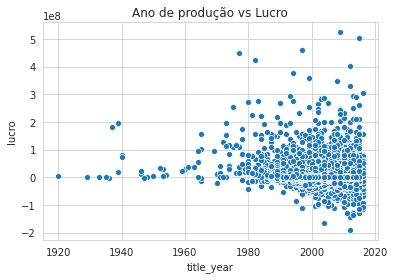

In [0]:
# Selecionando as variáveis lucro e ano de produção para plotar o gráfico.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
plt.title("Ano de produção vs Lucro")
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)
print(budget_gross.corr())

In [0]:
df_lp = imdb_usa.query('budget > 0 & gross > 0').sort_values('title_year', ascending=False)[['movie_title','title_year','lucro']].query('title_year == 2016').sort_values('lucro')
df_lp.head(23)

,movie_title,title_year,lucro
108,Warcraft,2016.0,-113021005.0
163,Gods of Egypt,2016.0,-108858926.0
106,Alice Through the Looking Glass,2016.0,-93153376.0
244,The Huntsman: Winter's War,2016.0,-67047980.0
92,Independence Day: Resurgence,2016.0,-62684455.0
63,The Legend of Tarzan,2016.0,-55948241.0
57,Star Trek Beyond,2016.0,-54531374.0
248,Teenage Mutant Ninja Turtles: Out of the Shadows,2016.0,-53361326.0
264,Allegiant,2016.0,-43997807.0
1010,Free State of Jones,2016.0,-29610033.0


In [0]:
tam_n = []
tam_p = []
for i in df_lp['lucro']:
  if i < 0:
    tam_n.append(i)
  else:
    tam_p.append(i)

le_n = len(tam_n)
le_p = len(tam_p)
total = df_lp.shape[0]
print("A porcentagem de filmes com prejuízo no ano de 2016 é: {}%".format(round((le_n/total)*100),2))
print("A porcentagem de filmes com lucro no ano de 2016 é: {}%".format(round((le_p/total)*100),2))

A porcentagem de filmes com prejuízo no ano de 2016 é: 45%
A porcentagem de filmes com lucro no ano de 2016 é: 55%


Com base na correlação Ano de produção do filme pelo lucro, vemos que o valor é muito baixo, o que implica que uma variável não diz muito a respeito da outra, impossibilitando a tomada de conclusões com base nesses parâmetros.
Já quando analisamos a porcentagem de lucro e prejuízo no último ano de produção de filmes, vemos que 55% do filmes tiveram lucro enquanto 45% tiveram prejuízo, o que implica dizer que o fator tempo não tem alta relevância no que diz respeito ao lucro do filme, talvez seja uma questão de qualidade do mesmo, já que mais da metade recuperaram o orçamento e ainda tiveram lucro. De modo geral, com base no gráfico, é perceptível que entre os anos de 1980 e 2016 há bastante filmes com prejuízo, mas a quantidade de filmes com lucro é ainda maior. 

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

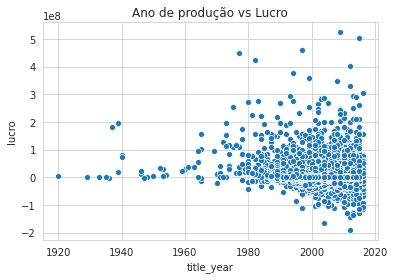

In [0]:
# Selecionando as variáveis lucro e ano de produção para plotar o gráfico.
budget_gross = imdb_usa.query("budget >0 | gross > 0")[["title_year", "lucro"]].dropna()
plt.title("Ano de produção vs Lucro")
sns.scatterplot(x="title_year", y="lucro", data = budget_gross)

In [0]:
# Definindo do dois filmes pré segunda guerra com mais lucro.
pre_g = imdb_usa.query('title_year <= 1940').sort_values('lucro', ascending=False)
pre_g.head(2)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,lucro
3970,Color,Victor Fleming,157.0,226.0,149.0,248.0,George Reeves,503.0,198655278.0,Drama|History|Romance|War,Hattie McDaniel,Gone with the Wind,215340,1862,Thomas Mitchell,1.0,battle of the sexes|gallantry|honesty|indiffer...,http://www.imdb.com/title/tt0031381/?ref_=fn_t...,706.0,English,USA,G,3977000.0,1939.0,384.0,8.2,1.37,16000,194678278.0
4449,Color,William Cottrell,145.0,83.0,0.0,31.0,Billy Gilbert,82.0,184925485.0,Animation|Family|Fantasy|Musical,Adriana Caselotti,Snow White and the Seven Dwarfs,133348,229,Lucille La Verne,1.0,dwarf|love|princess|queen|snow white,http://www.imdb.com/title/tt0029583/?ref_=fn_t...,204.0,English,USA,Approved,2000000.0,1937.0,47.0,7.7,1.37,0,182925485.0


Os filmes pré 2ª guerra que tiveram mais lucros foram:

1º: Gone with the Wind

2º: Snow White and the Seven Dwarfs

## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornetar ele nas redes sociais kkkkk)

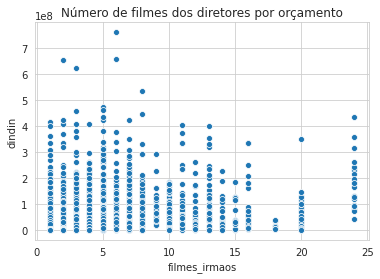

In [0]:
# Plotando um scatterplot de nº de filmes de diretores por orçamento.
plt.title("Número de filmes dos diretores por orçamento")
sns.scatterplot(x="filmes_irmaos", y="dindin", data = gross_director)

In [0]:
gross_director.query('15 < filmes_irmaos < 20').drop_duplicates('director_name').sort_values('filmes_irmaos', ascending=False).head(1)

,director_name,dindin,filmes_irmaos
1538,Woody Allen,7496522.0,18.0


## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

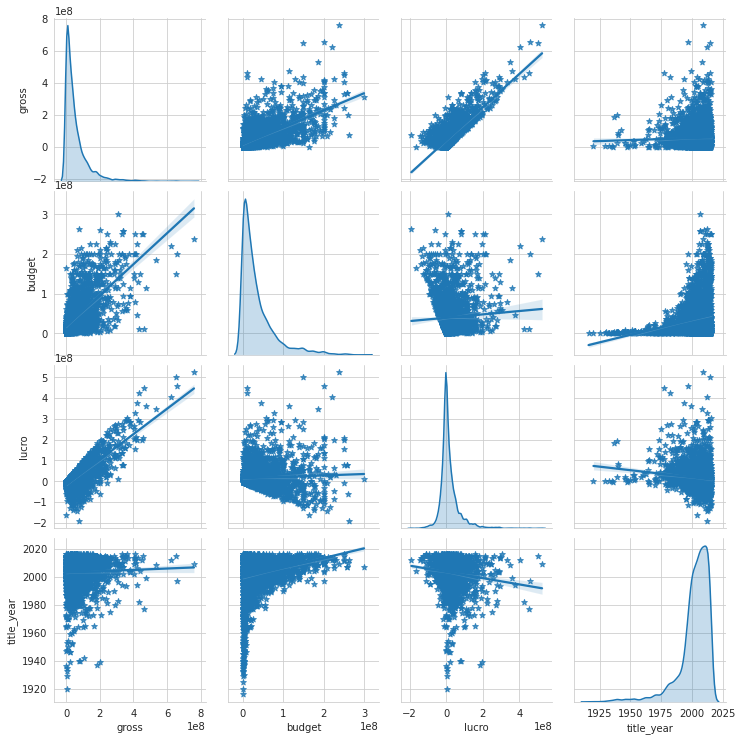

In [0]:
# Melhorando o pairplot
sns.pairplot(data= imdb_usa[["gross", "budget" ,  "lucro" , "title_year"]], kind="reg", corner=False, diag_kind="kde", markers="*", dropna=True, palette="husl")
plt.show()

Analisando a parte triangular superior dos plots acima, é possível perceber que há uma relação positiva não muito forte entre orçamento e faturamento, já entre lucro e faturamento há relação liner positiva forte, enquanto title_year vs gross praticamente não há relação linear, assim como lucro vs orçamento, title_year vs orçamento e title_year e lucro.

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

In [0]:
# Criando um sub DataFrame com filmes pós ano 2000.
imdb_usa_2000 = imdb_usa.query('title_year >= 2000')

In [0]:
# Criando uma tabela de correlação entre as variáveis abaixo para os filmes pós ano 2000.
imdb_usa_2000[["gross", "budget" , "lucro" , "imdb_score","title_year"]].corr()

,gross,budget,lucro,imdb_score,title_year
gross,1.000000,0.709233,0.770642,0.249020,0.105342
budget,0.709233,1.000000,0.097307,0.175561,0.058550
lucro,0.770642,0.097307,1.000000,0.243532,0.035039
imdb_score,0.249020,0.175561,0.243532,1.000000,-0.012229
title_year,0.105342,0.058550,0.035039,-0.012229,1.000000


Em relação aos filmes pós anos 2000, podemos verificar que há uma alta correlação entre as variáveis lucro vs gross e temos uma relevante correlação entre budget vs gross, mas não tão alta quanto a primeira. Já as demais correlações entre as variáveis são baixas.

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

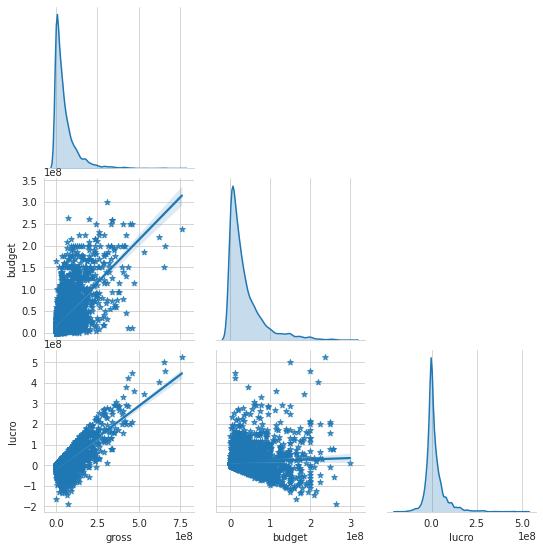

In [0]:
# Criando um sub Df com as váriaveis de interesse que com base no pairplot acima, aparenta ter relção linear.
sns.pairplot(data= imdb_usa[["gross", "budget" ,  "lucro" ]], kind="reg", corner=True, diag_kind="kde", markers="*", dropna=True, palette="husl")
plt.show()

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [0]:
# Selecionando a coluna de votos por ano.
imdb_usa_nv = imdb_usa.groupby("title_year").sum()["num_voted_users"]
imdb_usa_nv.head()

title_year
1916.0    10718
1920.0        5
1925.0     4849
1929.0     4546
1930.0     3753
Name: num_voted_users, dtype: int64

In [0]:
# Selecionando as variáveis e juntando com a coluna de votos por ano.
imdb_usa_naa = imdb_usa[[ "budget", "gross", "lucro", "title_year","imdb_score"]].set_index('title_year').join(imdb_usa_nv,on='title_year')
imdb_usa_naa.reset_index(level=0, inplace=True)
imdb_usa_naa

,title_year,budget,gross,lucro,imdb_score,num_voted_users
0,2009.0,237000000.0,760505847.0,523505847.0,7.9,16554036.0
1,2007.0,300000000.0,309404152.0,9404152.0,7.1,15884736.0
2,2012.0,250000000.0,448130642.0,198130642.0,8.5,19862275.0
3,2012.0,263700000.0,73058679.0,-190641321.0,6.6,19862275.0
4,2007.0,258000000.0,336530303.0,78530303.0,6.2,15884736.0
...,...,...,...,...,...,...
3768,2011.0,9000.0,4584.0,-4416.0,6.4,17472600.0
3769,NaN,NaN,NaN,NaN,7.5,NaN
3770,2013.0,1400.0,NaN,NaN,6.3,19853223.0
3771,2012.0,NaN,10443.0,NaN,6.3,19862275.0


In [0]:
# Calculando a correlação entre as variáveis.
imdb_usa_naa[[ "budget", "gross", "lucro", "title_year","imdb_score",'num_voted_users']].corr()

,budget,gross,lucro,title_year,imdb_score,num_voted_users
budget,1.000000,0.645673,0.053455,0.229453,0.078936,0.194059
gross,0.645673,1.000000,0.797037,0.034827,0.258948,0.004299
lucro,0.053455,0.797037,1.000000,-0.123035,0.294858,-0.114601
title_year,0.229453,0.034827,-0.123035,1.000000,-0.227569,0.762953
imdb_score,0.078936,0.258948,0.294858,-0.227569,1.000000,-0.165823
num_voted_users,0.194059,0.004299,-0.114601,0.762953,-0.165823,1.000000


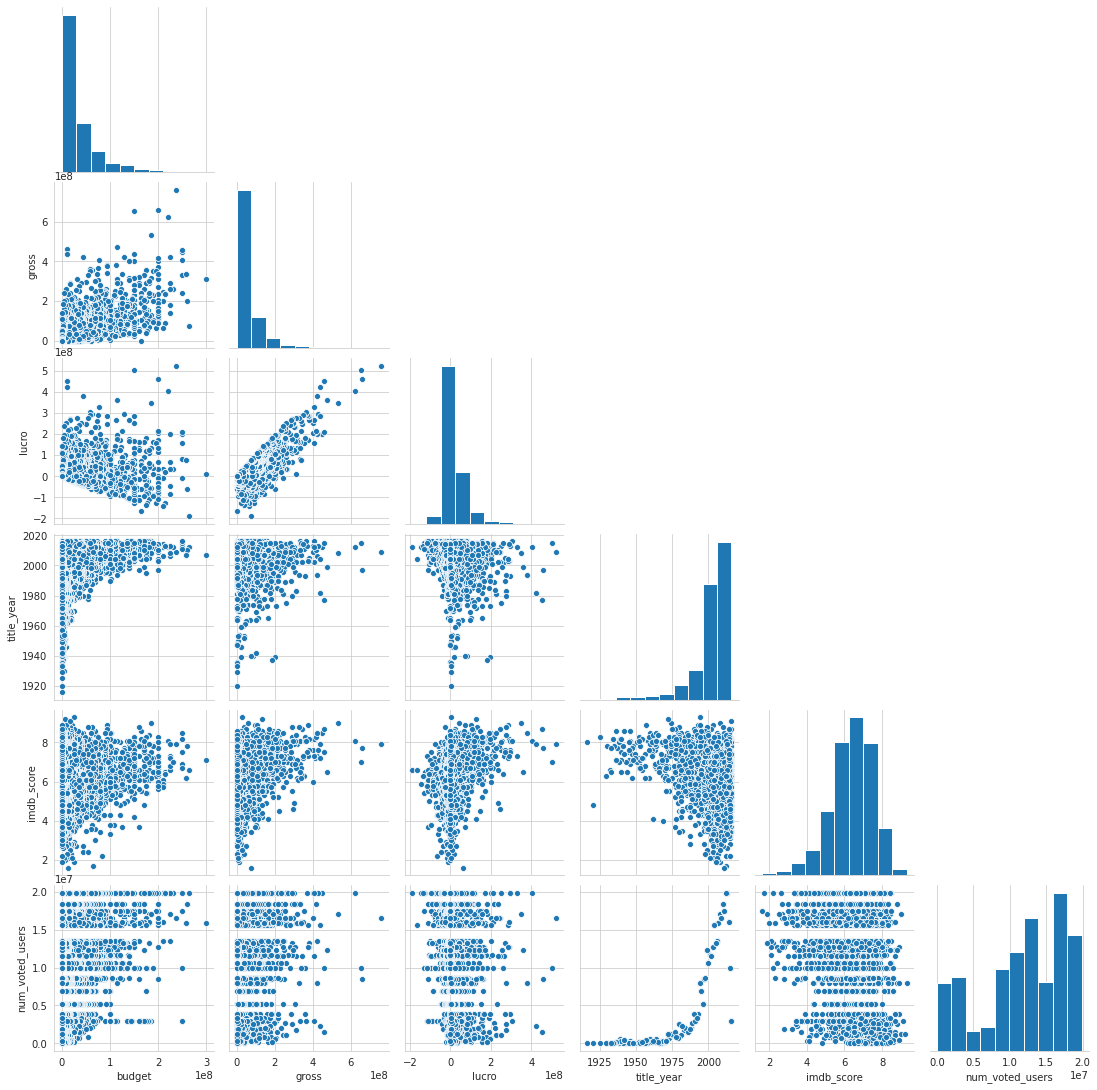

In [0]:
sns.pairplot(imdb_usa_naa[[ "budget", "gross", "lucro", "title_year","imdb_score",'num_voted_users']], corner=True)

Analisando a tabela acima, é possível verificar que há forte correlação entre lucro vs faturamento e número de votos vs ano do filme. Uma correlação relevante, mas não tão forte é a das variáveis faturamento vs orçamento.
Ja as demais correlações, não destacadas tem valores muito próximo de 0.